In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
station_info = pd.read_csv('../charles/queries/station_location_query/station_info_with_everythin.csv')
station_info = station_info[station_info['lat'] != 0]

# CREATE CLUSTERS BASED AVERAGE HOURLY AVAILABILITY FOR ALL DAYS OF WEEK

In [3]:
all_days = pd.read_csv('../communal/clusters_all_days_average_availability_per_hour_all_stations_2018-19_use_early_data.csv')
all_days

dock_id                            dock_name  hour  avail_bikes  \
0           82               St James Pl & Pearl St     0     2.000000   
1           82               St James Pl & Pearl St     1     2.000000   
2           82               St James Pl & Pearl St     2     2.000000   
3           82               St James Pl & Pearl St     3     2.000000   
4           82               St James Pl & Pearl St     4     2.500000   
...        ...                                  ...   ...          ...   
10623     3510  Adam Clayton Powell Blvd & W 123 St    19     9.000000   
10624     3510  Adam Clayton Powell Blvd & W 123 St    20     7.750000   
10625     3510  Adam Clayton Powell Blvd & W 123 St    21     8.333333   
10626     3510  Adam Clayton Powell Blvd & W 123 St    22     5.666667   
10627     3510  Adam Clayton Powell Blvd & W 123 St    23     7.000000   

       tot_docks  avail_bikes_proportion  
0           28.0                0.071429  
1           28.0                0.071429  
2           28.0                0.071429  
3           28.0                0.071429  
4           28.0                0.089286  
...          ...                     ...  
10623       31.0                0.290323  
10624       31.0                0.250000  
10625       31.0                0.268817  
10626       31.0                0.182796  
10627       31.0                0.225806  

[10628 rows x 6 columns]

In [4]:
all_days.dock_id.nunique()

470

In [5]:
avail_hrs = all_days.drop(columns = ['dock_name', 'avail_bikes', 'tot_docks'])
avail_hrs = avail_hrs.pivot_table(index = 'dock_id', columns = 'hour', 
               values = 'avail_bikes_proportion', aggfunc = 'mean')
avail_hrs

hour           0         1         2         3         4         5         6   \
dock_id                                                                         
82       0.071429  0.071429  0.071429  0.071429  0.089286  0.260989  0.336735   
83       0.400928  0.383529  0.395295  0.400978  0.392042  0.387965  0.390281   
116      0.366480  0.357555  0.369921  0.365500  0.350820  0.342816  0.349964   
119      0.505661  0.496507  0.513941  0.513005  0.515957  0.513014  0.509374   
120      0.463899  0.478037  0.476327  0.493875  0.487492  0.494451  0.494092   
...           ...       ...       ...       ...       ...       ...       ...   
3505     0.314394  0.502165  0.356902  0.374656  0.420875  0.390152  0.333333   
3506     0.280172  0.354680  0.310345  0.319749  0.340996  0.318966  0.306897   
3507     0.342593  0.384259  0.357143  0.361111  0.376984  0.347222  0.357143   
3509     0.682796  0.720430  0.705069  0.701613  0.617512  0.586022  0.580645   
3510     0.354839  0.354839  0.419355  0.354839  0.354839  0.290323  0.430108   

hour           7         8         9   ...        14        15        16  \
dock_id                                ...                                 
82       0.348214  0.345238  0.340659  ...  0.467532  0.406593  0.404762   
83       0.399482  0.413527  0.422928  ...  0.469056  0.473909  0.467885   
116      0.357443  0.347790  0.347050  ...  0.301313  0.283545  0.291217   
119      0.518773  0.518718  0.508745  ...  0.474500  0.479287  0.489703   
120      0.491146  0.466056  0.433842  ...  0.302496  0.295201  0.311933   
...           ...       ...       ...  ...       ...       ...       ...   
3505     0.384848  0.390152  0.319865  ...  0.345455  0.276094  0.303030   
3506     0.334483  0.306034  0.302682  ...  0.234483  0.256705  0.229885   
3507     0.400794  0.365741  0.430556  ...  0.420139  0.402778  0.444444   
3509     0.622120  0.596774  0.639785  ...  0.471774  0.430108  0.327957   
3510     0.354839  0.290323  0.397849  ...  0.209677  0.236559  0.225806   

hour           17        18        19        20        21        22        23  
dock_id                                                                        
82       0.413690  0.357143  0.342262  0.389610  0.395833  0.383929  0.375000  
83       0.474964  0.465125  0.470294  0.462296  0.460358  0.438677  0.426215  
116      0.311180  0.337361  0.352525  0.378433  0.397119  0.405136  0.415681  
119      0.497656  0.503486  0.503466  0.505596  0.508019  0.499613  0.496161  
120      0.329732  0.342328  0.358470  0.373451  0.402088  0.413394  0.432096  
...           ...       ...       ...       ...       ...       ...       ...  
3505     0.353535  0.299663  0.296296  0.345455  0.284848  0.380952  0.360606  
3506     0.264368  0.252874  0.287356  0.303448  0.279310  0.344828  0.317241  
3507     0.349206  0.313492  0.305556  0.261905  0.234127  0.272222  0.229167  
3509     0.327189  0.410138  0.311828  0.327189  0.294931  0.419355  0.346774  
3510     0.225806  0.204301  0.290323  0.250000  0.268817  0.182796  0.225806  

[470 rows x 24 columns]

In [6]:
avail_hrs = avail_hrs.dropna(axis = 0)
avail_hrs

hour           0         1         2         3         4         5         6   \
dock_id                                                                         
82       0.071429  0.071429  0.071429  0.071429  0.089286  0.260989  0.336735   
83       0.400928  0.383529  0.395295  0.400978  0.392042  0.387965  0.390281   
116      0.366480  0.357555  0.369921  0.365500  0.350820  0.342816  0.349964   
119      0.505661  0.496507  0.513941  0.513005  0.515957  0.513014  0.509374   
120      0.463899  0.478037  0.476327  0.493875  0.487492  0.494451  0.494092   
...           ...       ...       ...       ...       ...       ...       ...   
3505     0.314394  0.502165  0.356902  0.374656  0.420875  0.390152  0.333333   
3506     0.280172  0.354680  0.310345  0.319749  0.340996  0.318966  0.306897   
3507     0.342593  0.384259  0.357143  0.361111  0.376984  0.347222  0.357143   
3509     0.682796  0.720430  0.705069  0.701613  0.617512  0.586022  0.580645   
3510     0.354839  0.354839  0.419355  0.354839  0.354839  0.290323  0.430108   

hour           7         8         9   ...        14        15        16  \
dock_id                                ...                                 
82       0.348214  0.345238  0.340659  ...  0.467532  0.406593  0.404762   
83       0.399482  0.413527  0.422928  ...  0.469056  0.473909  0.467885   
116      0.357443  0.347790  0.347050  ...  0.301313  0.283545  0.291217   
119      0.518773  0.518718  0.508745  ...  0.474500  0.479287  0.489703   
120      0.491146  0.466056  0.433842  ...  0.302496  0.295201  0.311933   
...           ...       ...       ...  ...       ...       ...       ...   
3505     0.384848  0.390152  0.319865  ...  0.345455  0.276094  0.303030   
3506     0.334483  0.306034  0.302682  ...  0.234483  0.256705  0.229885   
3507     0.400794  0.365741  0.430556  ...  0.420139  0.402778  0.444444   
3509     0.622120  0.596774  0.639785  ...  0.471774  0.430108  0.327957   
3510     0.354839  0.290323  0.397849  ...  0.209677  0.236559  0.225806   

hour           17        18        19        20        21        22        23  
dock_id                                                                        
82       0.413690  0.357143  0.342262  0.389610  0.395833  0.383929  0.375000  
83       0.474964  0.465125  0.470294  0.462296  0.460358  0.438677  0.426215  
116      0.311180  0.337361  0.352525  0.378433  0.397119  0.405136  0.415681  
119      0.497656  0.503486  0.503466  0.505596  0.508019  0.499613  0.496161  
120      0.329732  0.342328  0.358470  0.373451  0.402088  0.413394  0.432096  
...           ...       ...       ...       ...       ...       ...       ...  
3505     0.353535  0.299663  0.296296  0.345455  0.284848  0.380952  0.360606  
3506     0.264368  0.252874  0.287356  0.303448  0.279310  0.344828  0.317241  
3507     0.349206  0.313492  0.305556  0.261905  0.234127  0.272222  0.229167  
3509     0.327189  0.410138  0.311828  0.327189  0.294931  0.419355  0.346774  
3510     0.225806  0.204301  0.290323  0.250000  0.268817  0.182796  0.225806  

[418 rows x 24 columns]

In [7]:
kmeans_model = KMeans(random_state=0)

In [8]:
def elbow_plot(k,data):
    inertia = []
    clusters = range(1,k)
    for cluster in clusters:
        kmeans_model = KMeans()
        kmeans_model.set_params(n_clusters=cluster, random_state = 5)
        kmeans_model.fit(data)
        inertia.append(kmeans_model.inertia_)
    plt.plot(clusters, inertia, marker= "x")
    plt.xlabel('k')
    plt.xticks(np.arange(k))
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

In [9]:
def kmeans_cluster_plots(k, data):
    df = data
    kmeans_model = KMeans()
    kmeans_model.set_params(n_clusters = k, random_state = 5)
    kmean = kmeans_model.fit_predict(df)
    df['cluster'] = kmean
    
    for i in range(k):
        cluster = df[df['cluster'] == i]
        cluster = np.array(cluster)
        for j in range(len(cluster)):
            plt.plot(range(24), cluster[j][:-1])
        plt.show()
    return df

In [10]:
def cluster_geography(k, data):
    df = kmeans_cluster_plots(k, data)
    copy = df.copy(deep = True)
    copy = copy.reset_index()
    copy = copy.merge(station_info, left_on = 'dock_id', right_on = 'station_id')
    
    px.scatter_mapbox(copy,
            lat = 'lat',
            lon = 'lon',
            color = 'cluster',
            mapbox_style = 'carto-positron',
            color_continuous_scale=['red','orange','yellow','green','blue','purple','black']
            ).show()
    

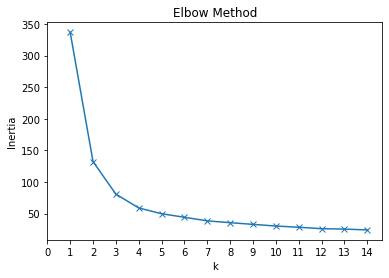

In [11]:
elbow_plot(15, avail_hrs)

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmean


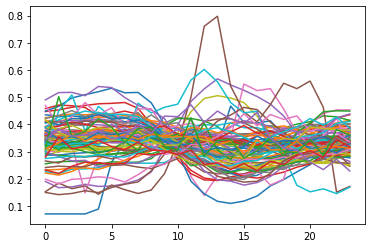

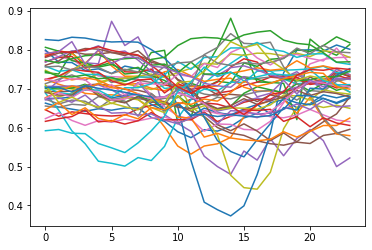

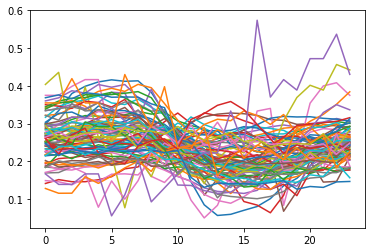

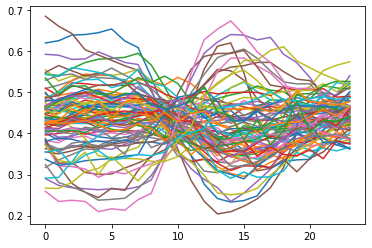

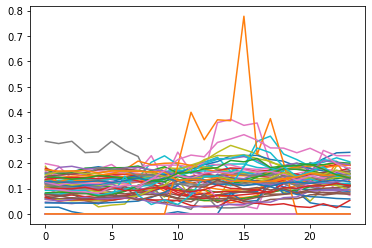

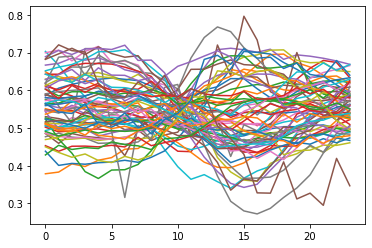

hour            0         1         2         3         4         5         6  \
dock_id                                                                         
82       0.071429  0.071429  0.071429  0.071429  0.089286  0.260989  0.336735   
83       0.400928  0.383529  0.395295  0.400978  0.392042  0.387965  0.390281   
116      0.366480  0.357555  0.369921  0.365500  0.350820  0.342816  0.349964   
119      0.505661  0.496507  0.513941  0.513005  0.515957  0.513014  0.509374   
120      0.463899  0.478037  0.476327  0.493875  0.487492  0.494451  0.494092   
...           ...       ...       ...       ...       ...       ...       ...   
3505     0.314394  0.502165  0.356902  0.374656  0.420875  0.390152  0.333333   
3506     0.280172  0.354680  0.310345  0.319749  0.340996  0.318966  0.306897   
3507     0.342593  0.384259  0.357143  0.361111  0.376984  0.347222  0.357143   
3509     0.682796  0.720430  0.705069  0.701613  0.617512  0.586022  0.580645   
3510     0.354839  0.354839  0.419355  0.354839  0.354839  0.290323  0.430108   

hour            7         8         9  ...        15        16        17  \
dock_id                                ...                                 
82       0.348214  0.345238  0.340659  ...  0.406593  0.404762  0.413690   
83       0.399482  0.413527  0.422928  ...  0.473909  0.467885  0.474964   
116      0.357443  0.347790  0.347050  ...  0.283545  0.291217  0.311180   
119      0.518773  0.518718  0.508745  ...  0.479287  0.489703  0.497656   
120      0.491146  0.466056  0.433842  ...  0.295201  0.311933  0.329732   
...           ...       ...       ...  ...       ...       ...       ...   
3505     0.384848  0.390152  0.319865  ...  0.276094  0.303030  0.353535   
3506     0.334483  0.306034  0.302682  ...  0.256705  0.229885  0.264368   
3507     0.400794  0.365741  0.430556  ...  0.402778  0.444444  0.349206   
3509     0.622120  0.596774  0.639785  ...  0.430108  0.327957  0.327189   
3510     0.354839  0.290323  0.397849  ...  0.236559  0.225806  0.225806   

hour           18        19        20        21        22        23  cluster  
dock_id                                                                       
82       0.357143  0.342262  0.389610  0.395833  0.383929  0.375000        0  
83       0.465125  0.470294  0.462296  0.460358  0.438677  0.426215        3  
116      0.337361  0.352525  0.378433  0.397119  0.405136  0.415681        0  
119      0.503486  0.503466  0.505596  0.508019  0.499613  0.496161        5  
120      0.342328  0.358470  0.373451  0.402088  0.413394  0.432096        3  
...           ...       ...       ...       ...       ...       ...      ...  
3505     0.299663  0.296296  0.345455  0.284848  0.380952  0.360606        0  
3506     0.252874  0.287356  0.303448  0.279310  0.344828  0.317241        0  
3507     0.313492  0.305556  0.261905  0.234127  0.272222  0.229167        0  
3509     0.410138  0.311828  0.327189  0.294931  0.419355  0.346774        5  
3510     0.204301  0.290323  0.250000  0.268817  0.182796  0.225806        2  

[418 rows x 25 columns]

In [12]:
kmeans_cluster_plots(6, avail_hrs)

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmean


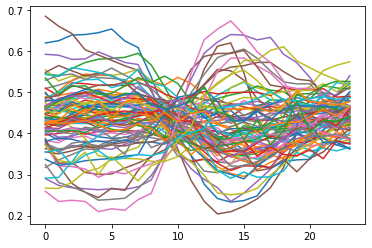

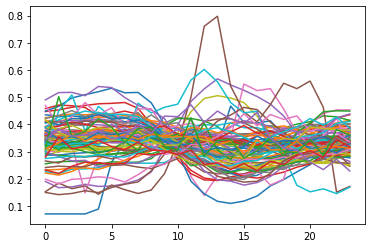

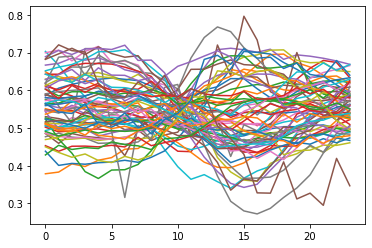

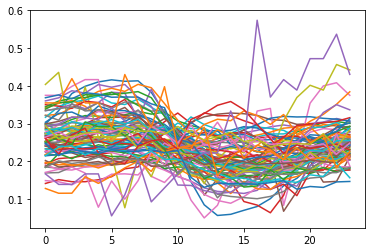

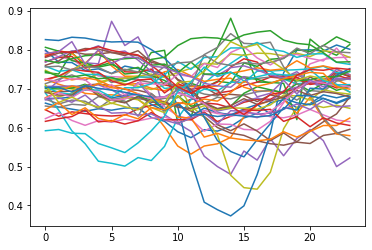

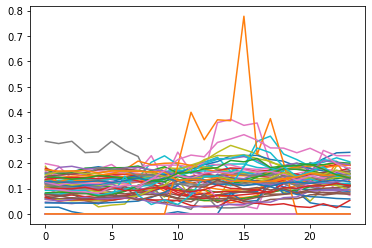

In [13]:
cluster_geography(6, avail_hrs)

# CREATE CLUSTERS BASED AVERAGE HOURLY AVAILABILITY FOR ALL WEEKDAYS

In [14]:
weekdays = pd.read_csv('../communal/clusters_weekday_average_availability_per_hour_all_stations_2018-19_use_early_data.csv')
weekdays

dock_id               dock_name  hour  avail_bikes  tot_docks  \
0           82  St James Pl & Pearl St     0    19.000000       28.0   
1           82  St James Pl & Pearl St     1    19.000000       28.0   
2           82  St James Pl & Pearl St     2    19.000000       28.0   
3           82  St James Pl & Pearl St     3    19.000000       28.0   
4           82  St James Pl & Pearl St     4    19.285714       28.0   
...        ...                     ...   ...          ...        ...   
11692     3512           27 Ave & 4 St    19    16.500000       19.0   
11693     3512           27 Ave & 4 St    20    16.666667       19.0   
11694     3512           27 Ave & 4 St    21    16.666667       19.0   
11695     3512           27 Ave & 4 St    22    17.000000       19.0   
11696     3512           27 Ave & 4 St    23    17.000000       19.0   

       avail_bikes_proportion  
0                    0.678571  
1                    0.678571  
2                    0.678571  
3                    0.678571  
4                    0.688776  
...                       ...  
11692                0.868421  
11693                0.877193  
11694                0.877193  
11695                0.894737  
11696                0.894737  

[11697 rows x 6 columns]

In [15]:
all_days.dock_id.nunique()

470

In [16]:
avail_hrs_weekday = weekdays.drop(columns = ['dock_name', 'avail_bikes', 'tot_docks'])
avail_hrs_weekday = avail_hrs_weekday.pivot_table(index = 'dock_id', columns = 'hour', 
               values = 'avail_bikes_proportion', aggfunc = 'mean')
avail_hrs_weekday

hour           0         1         2         3         4         5         6   \
dock_id                                                                         
82       0.678571  0.678571  0.678571  0.678571  0.688776  0.714286  0.690476   
83       0.382676  0.369743  0.367470  0.363707  0.367415  0.359703  0.367415   
116      0.304787  0.300124  0.291149  0.289517  0.286924  0.286163  0.289946   
119      0.525522  0.521135  0.519436  0.511913  0.522133  0.524241  0.523649   
120      0.576736  0.587963  0.590232  0.583333  0.587085  0.582807  0.555049   
...           ...       ...       ...       ...       ...       ...       ...   
3507     0.160714  0.175214  0.156746  0.170370  0.192308  0.155556  0.155093   
3509     0.451613  0.411290  0.510753  0.493797  0.456989  0.382134  0.392962   
3510     0.293907  0.297491  0.302419  0.290323  0.290323  0.283154  0.290323   
3511     0.311688  0.279221  0.331169  0.305195  0.306818  0.311688  0.295455   
3512     0.894737  0.894737  0.894737  0.894737  0.894737  0.894737  0.894737   

hour           7         8         9   ...        14        15        16  \
dock_id                                ...                                 
82       0.672619  0.585714  0.261905  ...       NaN       NaN       NaN   
83       0.380582  0.390017  0.396988  ...  0.398500  0.402180  0.400322   
116      0.290744  0.304995  0.373958  ...  0.470322  0.422999  0.369809   
119      0.500343  0.481203  0.443972  ...  0.396189  0.403724  0.418906   
120      0.503783  0.396485  0.239502  ...  0.216996  0.222675  0.231317   
...           ...       ...       ...  ...       ...       ...       ...   
3507     0.141026  0.286325  0.310606  ...  0.339744  0.323413  0.459402   
3509     0.492669  0.325269  0.365591  ...  0.454839  0.296188  0.466276   
3510     0.270161  0.229839  0.165899  ...  0.173387  0.165323  0.207885   
3511     0.272727  0.257576  0.196970  ...  0.106061  0.083333  0.068182   
3512     0.868421  0.868421  0.842105  ...  0.863158  0.881579  0.873684   

hour           17        18        19        20        21        22        23  
dock_id                                                                        
82            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
83       0.405040  0.413869  0.422151  0.443605  0.437008  0.421532  0.407158  
116      0.271350  0.199215  0.216213  0.224061  0.261496  0.285120  0.292224  
119      0.436636  0.473967  0.509836  0.516859  0.519797  0.529233  0.535628  
120      0.250239  0.304324  0.407803  0.478615  0.516870  0.546692  0.567698  
...           ...       ...       ...       ...       ...       ...       ...  
3507     0.448413  0.438889  0.335648  0.269231  0.254274  0.277778  0.248016  
3509     0.368280  0.539171  0.629032  0.623656  0.727273  0.606452  0.731183  
3510     0.186380  0.254839  0.262673  0.322581  0.313364  0.330645  0.326613  
3511     0.068182  0.103896  0.113636  0.188312  0.280303  0.250000  0.310606  
3512     0.881579  0.868421  0.868421  0.877193  0.877193  0.894737  0.894737  

[557 rows x 24 columns]

In [17]:
avail_hrs_weekday = avail_hrs_weekday.dropna(axis = 0)
avail_hrs_weekday

hour           0         1         2         3         4         5         6   \
dock_id                                                                         
83       0.382676  0.369743  0.367470  0.363707  0.367415  0.359703  0.367415   
116      0.304787  0.300124  0.291149  0.289517  0.286924  0.286163  0.289946   
119      0.525522  0.521135  0.519436  0.511913  0.522133  0.524241  0.523649   
120      0.576736  0.587963  0.590232  0.583333  0.587085  0.582807  0.555049   
127      0.555556  0.583333  0.611111  0.555556  0.555556  0.472222  0.444444   
...           ...       ...       ...       ...       ...       ...       ...   
3507     0.160714  0.175214  0.156746  0.170370  0.192308  0.155556  0.155093   
3509     0.451613  0.411290  0.510753  0.493797  0.456989  0.382134  0.392962   
3510     0.293907  0.297491  0.302419  0.290323  0.290323  0.283154  0.290323   
3511     0.311688  0.279221  0.331169  0.305195  0.306818  0.311688  0.295455   
3512     0.894737  0.894737  0.894737  0.894737  0.894737  0.894737  0.894737   

hour           7         8         9   ...        14        15        16  \
dock_id                                ...                                 
83       0.380582  0.390017  0.396988  ...  0.398500  0.402180  0.400322   
116      0.290744  0.304995  0.373958  ...  0.470322  0.422999  0.369809   
119      0.500343  0.481203  0.443972  ...  0.396189  0.403724  0.418906   
120      0.503783  0.396485  0.239502  ...  0.216996  0.222675  0.231317   
127      0.552469  0.407407  0.335859  ...  0.560606  0.432540  0.222222   
...           ...       ...       ...  ...       ...       ...       ...   
3507     0.141026  0.286325  0.310606  ...  0.339744  0.323413  0.459402   
3509     0.492669  0.325269  0.365591  ...  0.454839  0.296188  0.466276   
3510     0.270161  0.229839  0.165899  ...  0.173387  0.165323  0.207885   
3511     0.272727  0.257576  0.196970  ...  0.106061  0.083333  0.068182   
3512     0.868421  0.868421  0.842105  ...  0.863158  0.881579  0.873684   

hour           17        18        19        20        21        22        23  
dock_id                                                                        
83       0.405040  0.413869  0.422151  0.443605  0.437008  0.421532  0.407158  
116      0.271350  0.199215  0.216213  0.224061  0.261496  0.285120  0.292224  
119      0.436636  0.473967  0.509836  0.516859  0.519797  0.529233  0.535628  
120      0.250239  0.304324  0.407803  0.478615  0.516870  0.546692  0.567698  
127      0.355556  0.116667  0.245370  0.412037  0.379630  0.370370  0.567460  
...           ...       ...       ...       ...       ...       ...       ...  
3507     0.448413  0.438889  0.335648  0.269231  0.254274  0.277778  0.248016  
3509     0.368280  0.539171  0.629032  0.623656  0.727273  0.606452  0.731183  
3510     0.186380  0.254839  0.262673  0.322581  0.313364  0.330645  0.326613  
3511     0.068182  0.103896  0.113636  0.188312  0.280303  0.250000  0.310606  
3512     0.881579  0.868421  0.868421  0.877193  0.877193  0.894737  0.894737  

[447 rows x 24 columns]

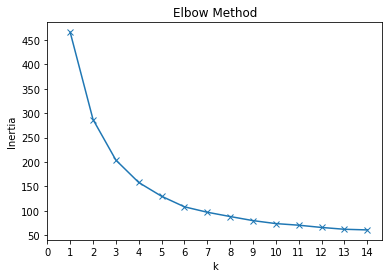

In [18]:
elbow_plot(15, avail_hrs_weekday)

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



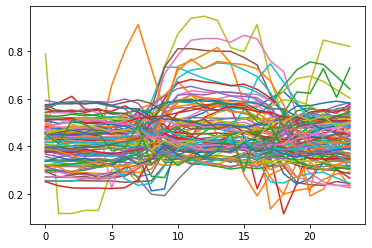

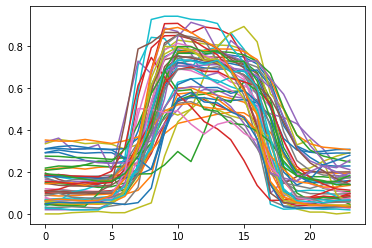

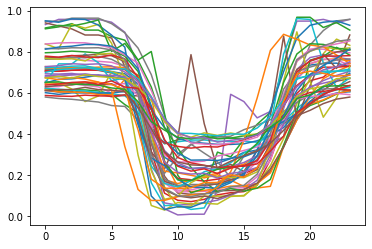

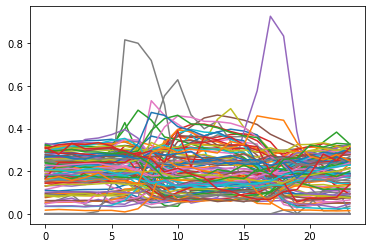

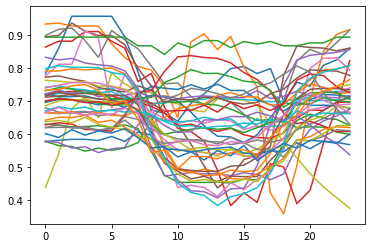

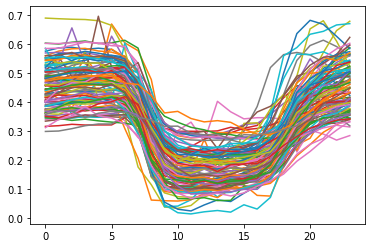

hour            0         1         2         3         4         5         6  \
dock_id                                                                         
83       0.382676  0.369743  0.367470  0.363707  0.367415  0.359703  0.367415   
116      0.304787  0.300124  0.291149  0.289517  0.286924  0.286163  0.289946   
119      0.525522  0.521135  0.519436  0.511913  0.522133  0.524241  0.523649   
120      0.576736  0.587963  0.590232  0.583333  0.587085  0.582807  0.555049   
127      0.555556  0.583333  0.611111  0.555556  0.555556  0.472222  0.444444   
...           ...       ...       ...       ...       ...       ...       ...   
3507     0.160714  0.175214  0.156746  0.170370  0.192308  0.155556  0.155093   
3509     0.451613  0.411290  0.510753  0.493797  0.456989  0.382134  0.392962   
3510     0.293907  0.297491  0.302419  0.290323  0.290323  0.283154  0.290323   
3511     0.311688  0.279221  0.331169  0.305195  0.306818  0.311688  0.295455   
3512     0.894737  0.894737  0.894737  0.894737  0.894737  0.894737  0.894737   

hour            7         8         9  ...        15        16        17  \
dock_id                                ...                                 
83       0.380582  0.390017  0.396988  ...  0.402180  0.400322  0.405040   
116      0.290744  0.304995  0.373958  ...  0.422999  0.369809  0.271350   
119      0.500343  0.481203  0.443972  ...  0.403724  0.418906  0.436636   
120      0.503783  0.396485  0.239502  ...  0.222675  0.231317  0.250239   
127      0.552469  0.407407  0.335859  ...  0.432540  0.222222  0.355556   
...           ...       ...       ...  ...       ...       ...       ...   
3507     0.141026  0.286325  0.310606  ...  0.323413  0.459402  0.448413   
3509     0.492669  0.325269  0.365591  ...  0.296188  0.466276  0.368280   
3510     0.270161  0.229839  0.165899  ...  0.165323  0.207885  0.186380   
3511     0.272727  0.257576  0.196970  ...  0.083333  0.068182  0.068182   
3512     0.868421  0.868421  0.842105  ...  0.881579  0.873684  0.881579   

hour           18        19        20        21        22        23  cluster  
dock_id                                                                       
83       0.413869  0.422151  0.443605  0.437008  0.421532  0.407158        0  
116      0.199215  0.216213  0.224061  0.261496  0.285120  0.292224        0  
119      0.473967  0.509836  0.516859  0.519797  0.529233  0.535628        0  
120      0.304324  0.407803  0.478615  0.516870  0.546692  0.567698        5  
127      0.116667  0.245370  0.412037  0.379630  0.370370  0.567460        0  
...           ...       ...       ...       ...       ...       ...      ...  
3507     0.438889  0.335648  0.269231  0.254274  0.277778  0.248016        3  
3509     0.539171  0.629032  0.623656  0.727273  0.606452  0.731183        0  
3510     0.254839  0.262673  0.322581  0.313364  0.330645  0.326613        3  
3511     0.103896  0.113636  0.188312  0.280303  0.250000  0.310606        3  
3512     0.868421  0.868421  0.877193  0.877193  0.894737  0.894737        4  

[447 rows x 25 columns]

In [19]:
kmeans_cluster_plots(6, avail_hrs_weekday)

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



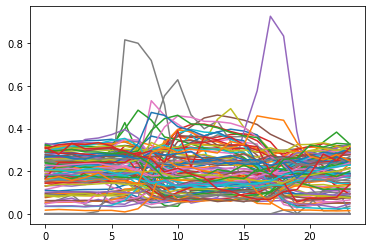

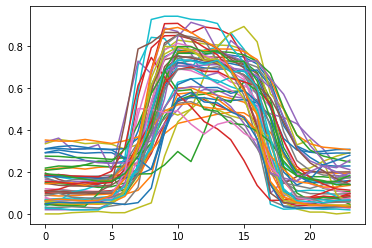

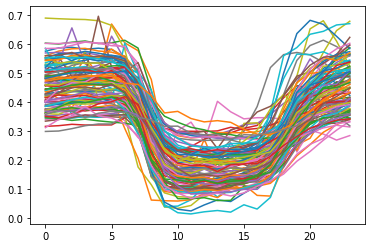

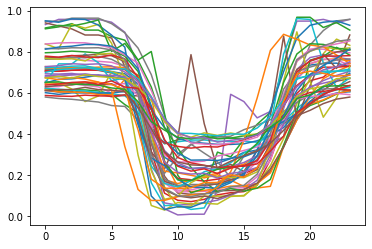

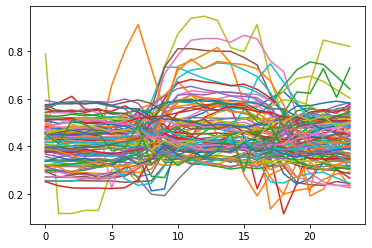

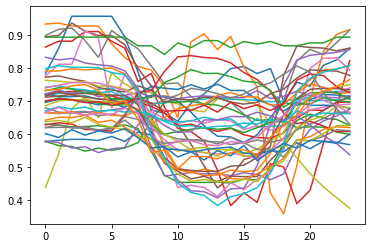

In [20]:
cluster_geography(6, avail_hrs_weekday)

# CREATE CLUSTERS BASED AVERAGE HOURLY AVAILABILITY FOR ALL WEEKENDS

In [21]:
weekends = pd.read_csv('../communal/clusters_weekend_average_availability_per_hour_all_stations_2018-19_use_early_data.csv')
weekends

dock_id                            dock_name  hour  avail_bikes  \
0           82               St James Pl & Pearl St     0     2.000000   
1           82               St James Pl & Pearl St     1     2.000000   
2           82               St James Pl & Pearl St     2     2.000000   
3           82               St James Pl & Pearl St     3     2.000000   
4           82               St James Pl & Pearl St     4     2.500000   
...        ...                                  ...   ...          ...   
10623     3510  Adam Clayton Powell Blvd & W 123 St    19     9.000000   
10624     3510  Adam Clayton Powell Blvd & W 123 St    20     7.750000   
10625     3510  Adam Clayton Powell Blvd & W 123 St    21     8.333333   
10626     3510  Adam Clayton Powell Blvd & W 123 St    22     5.666667   
10627     3510  Adam Clayton Powell Blvd & W 123 St    23     7.000000   

       tot_docks  avail_bikes_proportion  
0           28.0                0.071429  
1           28.0                0.071429  
2           28.0                0.071429  
3           28.0                0.071429  
4           28.0                0.089286  
...          ...                     ...  
10623       31.0                0.290323  
10624       31.0                0.250000  
10625       31.0                0.268817  
10626       31.0                0.182796  
10627       31.0                0.225806  

[10628 rows x 6 columns]

In [22]:
weekends.dock_id.nunique()

470

In [23]:
avail_hrs_weekend = weekends.drop(columns = ['dock_name', 'avail_bikes', 'tot_docks'])
avail_hrs_weekend = avail_hrs_weekend.pivot_table(index = 'dock_id', columns = 'hour', 
               values = 'avail_bikes_proportion', aggfunc = 'mean')
avail_hrs_weekend

hour           0         1         2         3         4         5         6   \
dock_id                                                                         
82       0.071429  0.071429  0.071429  0.071429  0.089286  0.260989  0.336735   
83       0.400928  0.383529  0.395295  0.400978  0.392042  0.387965  0.390281   
116      0.366480  0.357555  0.369921  0.365500  0.350820  0.342816  0.349964   
119      0.505661  0.496507  0.513941  0.513005  0.515957  0.513014  0.509374   
120      0.463899  0.478037  0.476327  0.493875  0.487492  0.494451  0.494092   
...           ...       ...       ...       ...       ...       ...       ...   
3505     0.314394  0.502165  0.356902  0.374656  0.420875  0.390152  0.333333   
3506     0.280172  0.354680  0.310345  0.319749  0.340996  0.318966  0.306897   
3507     0.342593  0.384259  0.357143  0.361111  0.376984  0.347222  0.357143   
3509     0.682796  0.720430  0.705069  0.701613  0.617512  0.586022  0.580645   
3510     0.354839  0.354839  0.419355  0.354839  0.354839  0.290323  0.430108   

hour           7         8         9   ...        14        15        16  \
dock_id                                ...                                 
82       0.348214  0.345238  0.340659  ...  0.467532  0.406593  0.404762   
83       0.399482  0.413527  0.422928  ...  0.469056  0.473909  0.467885   
116      0.357443  0.347790  0.347050  ...  0.301313  0.283545  0.291217   
119      0.518773  0.518718  0.508745  ...  0.474500  0.479287  0.489703   
120      0.491146  0.466056  0.433842  ...  0.302496  0.295201  0.311933   
...           ...       ...       ...  ...       ...       ...       ...   
3505     0.384848  0.390152  0.319865  ...  0.345455  0.276094  0.303030   
3506     0.334483  0.306034  0.302682  ...  0.234483  0.256705  0.229885   
3507     0.400794  0.365741  0.430556  ...  0.420139  0.402778  0.444444   
3509     0.622120  0.596774  0.639785  ...  0.471774  0.430108  0.327957   
3510     0.354839  0.290323  0.397849  ...  0.209677  0.236559  0.225806   

hour           17        18        19        20        21        22        23  
dock_id                                                                        
82       0.413690  0.357143  0.342262  0.389610  0.395833  0.383929  0.375000  
83       0.474964  0.465125  0.470294  0.462296  0.460358  0.438677  0.426215  
116      0.311180  0.337361  0.352525  0.378433  0.397119  0.405136  0.415681  
119      0.497656  0.503486  0.503466  0.505596  0.508019  0.499613  0.496161  
120      0.329732  0.342328  0.358470  0.373451  0.402088  0.413394  0.432096  
...           ...       ...       ...       ...       ...       ...       ...  
3505     0.353535  0.299663  0.296296  0.345455  0.284848  0.380952  0.360606  
3506     0.264368  0.252874  0.287356  0.303448  0.279310  0.344828  0.317241  
3507     0.349206  0.313492  0.305556  0.261905  0.234127  0.272222  0.229167  
3509     0.327189  0.410138  0.311828  0.327189  0.294931  0.419355  0.346774  
3510     0.225806  0.204301  0.290323  0.250000  0.268817  0.182796  0.225806  

[470 rows x 24 columns]

In [24]:
avail_hrs_weekend = avail_hrs_weekend.dropna(axis = 0)
avail_hrs_weekend

hour           0         1         2         3         4         5         6   \
dock_id                                                                         
82       0.071429  0.071429  0.071429  0.071429  0.089286  0.260989  0.336735   
83       0.400928  0.383529  0.395295  0.400978  0.392042  0.387965  0.390281   
116      0.366480  0.357555  0.369921  0.365500  0.350820  0.342816  0.349964   
119      0.505661  0.496507  0.513941  0.513005  0.515957  0.513014  0.509374   
120      0.463899  0.478037  0.476327  0.493875  0.487492  0.494451  0.494092   
...           ...       ...       ...       ...       ...       ...       ...   
3505     0.314394  0.502165  0.356902  0.374656  0.420875  0.390152  0.333333   
3506     0.280172  0.354680  0.310345  0.319749  0.340996  0.318966  0.306897   
3507     0.342593  0.384259  0.357143  0.361111  0.376984  0.347222  0.357143   
3509     0.682796  0.720430  0.705069  0.701613  0.617512  0.586022  0.580645   
3510     0.354839  0.354839  0.419355  0.354839  0.354839  0.290323  0.430108   

hour           7         8         9   ...        14        15        16  \
dock_id                                ...                                 
82       0.348214  0.345238  0.340659  ...  0.467532  0.406593  0.404762   
83       0.399482  0.413527  0.422928  ...  0.469056  0.473909  0.467885   
116      0.357443  0.347790  0.347050  ...  0.301313  0.283545  0.291217   
119      0.518773  0.518718  0.508745  ...  0.474500  0.479287  0.489703   
120      0.491146  0.466056  0.433842  ...  0.302496  0.295201  0.311933   
...           ...       ...       ...  ...       ...       ...       ...   
3505     0.384848  0.390152  0.319865  ...  0.345455  0.276094  0.303030   
3506     0.334483  0.306034  0.302682  ...  0.234483  0.256705  0.229885   
3507     0.400794  0.365741  0.430556  ...  0.420139  0.402778  0.444444   
3509     0.622120  0.596774  0.639785  ...  0.471774  0.430108  0.327957   
3510     0.354839  0.290323  0.397849  ...  0.209677  0.236559  0.225806   

hour           17        18        19        20        21        22        23  
dock_id                                                                        
82       0.413690  0.357143  0.342262  0.389610  0.395833  0.383929  0.375000  
83       0.474964  0.465125  0.470294  0.462296  0.460358  0.438677  0.426215  
116      0.311180  0.337361  0.352525  0.378433  0.397119  0.405136  0.415681  
119      0.497656  0.503486  0.503466  0.505596  0.508019  0.499613  0.496161  
120      0.329732  0.342328  0.358470  0.373451  0.402088  0.413394  0.432096  
...           ...       ...       ...       ...       ...       ...       ...  
3505     0.353535  0.299663  0.296296  0.345455  0.284848  0.380952  0.360606  
3506     0.264368  0.252874  0.287356  0.303448  0.279310  0.344828  0.317241  
3507     0.349206  0.313492  0.305556  0.261905  0.234127  0.272222  0.229167  
3509     0.327189  0.410138  0.311828  0.327189  0.294931  0.419355  0.346774  
3510     0.225806  0.204301  0.290323  0.250000  0.268817  0.182796  0.225806  

[418 rows x 24 columns]

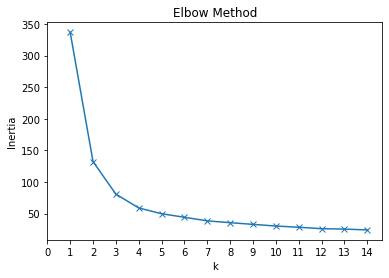

In [25]:
elbow_plot(15, avail_hrs_weekend)

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



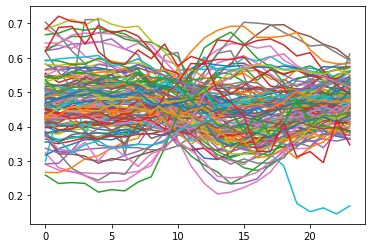

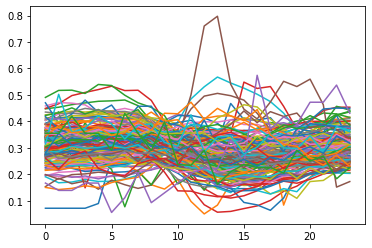

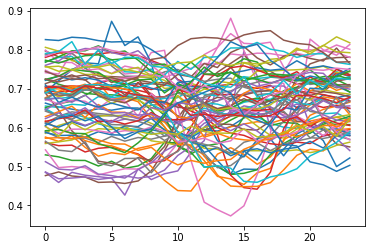

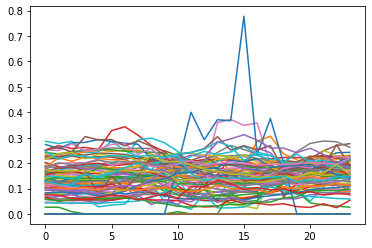

hour            0         1         2         3         4         5         6  \
dock_id                                                                         
82       0.071429  0.071429  0.071429  0.071429  0.089286  0.260989  0.336735   
83       0.400928  0.383529  0.395295  0.400978  0.392042  0.387965  0.390281   
116      0.366480  0.357555  0.369921  0.365500  0.350820  0.342816  0.349964   
119      0.505661  0.496507  0.513941  0.513005  0.515957  0.513014  0.509374   
120      0.463899  0.478037  0.476327  0.493875  0.487492  0.494451  0.494092   
...           ...       ...       ...       ...       ...       ...       ...   
3505     0.314394  0.502165  0.356902  0.374656  0.420875  0.390152  0.333333   
3506     0.280172  0.354680  0.310345  0.319749  0.340996  0.318966  0.306897   
3507     0.342593  0.384259  0.357143  0.361111  0.376984  0.347222  0.357143   
3509     0.682796  0.720430  0.705069  0.701613  0.617512  0.586022  0.580645   
3510     0.354839  0.354839  0.419355  0.354839  0.354839  0.290323  0.430108   

hour            7         8         9  ...        15        16        17  \
dock_id                                ...                                 
82       0.348214  0.345238  0.340659  ...  0.406593  0.404762  0.413690   
83       0.399482  0.413527  0.422928  ...  0.473909  0.467885  0.474964   
116      0.357443  0.347790  0.347050  ...  0.283545  0.291217  0.311180   
119      0.518773  0.518718  0.508745  ...  0.479287  0.489703  0.497656   
120      0.491146  0.466056  0.433842  ...  0.295201  0.311933  0.329732   
...           ...       ...       ...  ...       ...       ...       ...   
3505     0.384848  0.390152  0.319865  ...  0.276094  0.303030  0.353535   
3506     0.334483  0.306034  0.302682  ...  0.256705  0.229885  0.264368   
3507     0.400794  0.365741  0.430556  ...  0.402778  0.444444  0.349206   
3509     0.622120  0.596774  0.639785  ...  0.430108  0.327957  0.327189   
3510     0.354839  0.290323  0.397849  ...  0.236559  0.225806  0.225806   

hour           18        19        20        21        22        23  cluster  
dock_id                                                                       
82       0.357143  0.342262  0.389610  0.395833  0.383929  0.375000        1  
83       0.465125  0.470294  0.462296  0.460358  0.438677  0.426215        0  
116      0.337361  0.352525  0.378433  0.397119  0.405136  0.415681        1  
119      0.503486  0.503466  0.505596  0.508019  0.499613  0.496161        0  
120      0.342328  0.358470  0.373451  0.402088  0.413394  0.432096        0  
...           ...       ...       ...       ...       ...       ...      ...  
3505     0.299663  0.296296  0.345455  0.284848  0.380952  0.360606        1  
3506     0.252874  0.287356  0.303448  0.279310  0.344828  0.317241        1  
3507     0.313492  0.305556  0.261905  0.234127  0.272222  0.229167        1  
3509     0.410138  0.311828  0.327189  0.294931  0.419355  0.346774        0  
3510     0.204301  0.290323  0.250000  0.268817  0.182796  0.225806        1  

[418 rows x 25 columns]

In [26]:
kmeans_cluster_plots(4, avail_hrs_weekend)

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



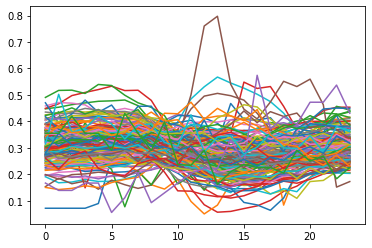

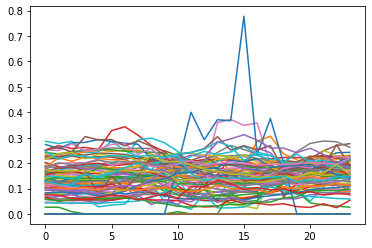

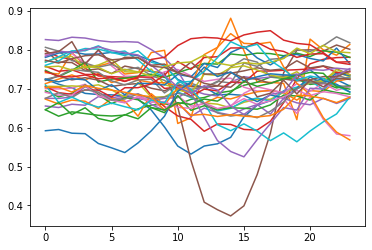

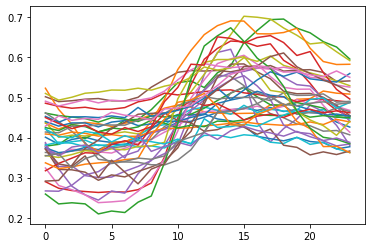

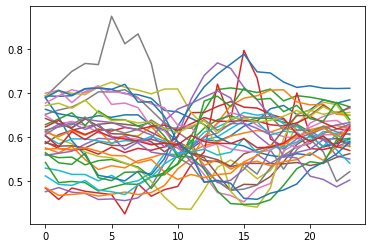

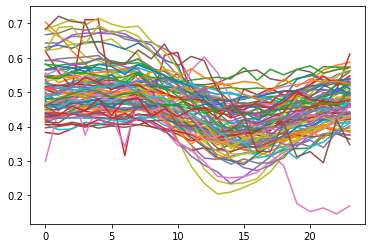

In [27]:
cluster_geography(6, avail_hrs_weekend)

In [28]:
weekdays

dock_id               dock_name  hour  avail_bikes  tot_docks  \
0           82  St James Pl & Pearl St     0    19.000000       28.0   
1           82  St James Pl & Pearl St     1    19.000000       28.0   
2           82  St James Pl & Pearl St     2    19.000000       28.0   
3           82  St James Pl & Pearl St     3    19.000000       28.0   
4           82  St James Pl & Pearl St     4    19.285714       28.0   
...        ...                     ...   ...          ...        ...   
11692     3512           27 Ave & 4 St    19    16.500000       19.0   
11693     3512           27 Ave & 4 St    20    16.666667       19.0   
11694     3512           27 Ave & 4 St    21    16.666667       19.0   
11695     3512           27 Ave & 4 St    22    17.000000       19.0   
11696     3512           27 Ave & 4 St    23    17.000000       19.0   

       avail_bikes_proportion  
0                    0.678571  
1                    0.678571  
2                    0.678571  
3                    0.678571  
4                    0.688776  
...                       ...  
11692                0.868421  
11693                0.877193  
11694                0.877193  
11695                0.894737  
11696                0.894737  

[11697 rows x 6 columns]

In [29]:
station_info

Unnamed: 0                         station_name        lat        lon  \
0              0              Lispenard St & Broadway  40.719000 -74.002472   
1              1                   Broadway & W 55 St  40.764000 -73.983000   
2              2                    E 6 St & Avenue B  40.724537 -73.981854   
3              3                   E 84 St & Park Ave  40.778627 -73.959000   
4              4                      E 25 St & 1 Ave  40.737000 -73.977387   
...          ...                                  ...        ...        ...   
1424        1424                     Broadway & 49 St  40.755389 -73.911517   
1425        1425  Prototype Lab Motivate Headquarters  40.656596 -74.008493   
1426        1426                  21 Ave & Shore Blvd  40.783956 -73.916894   
1428        1428                     2 Ave & E 105 St  40.789817 -73.942961   
1429        1429                       31 Ave & 61 St  40.757525 -73.901614   

      station_id    borough zip_code  
0          257.0  Manhattan    10003  
1          468.0  Manhattan    10019  
2          317.0  Manhattan    10009  
3         3145.0  Manhattan    10028  
4          174.0  Manhattan    10010  
...          ...        ...      ...  
1424      4318.0     Queens    11373  
1425      3487.0   Brooklyn    11232  
1426      4275.0     Queens    11105  
1428      3385.0  Manhattan    10029  
1429      4271.0     Queens    11369  

[1425 rows x 7 columns]

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



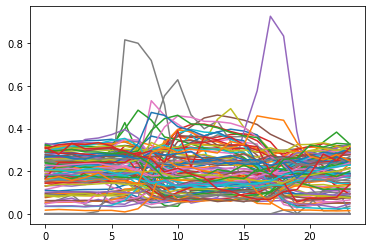

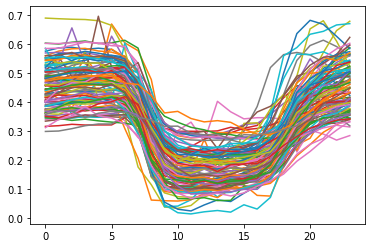

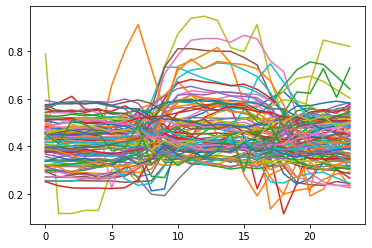

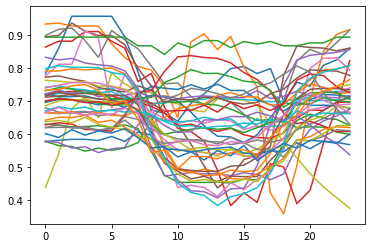

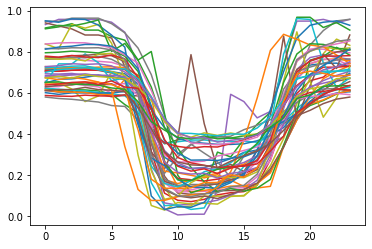

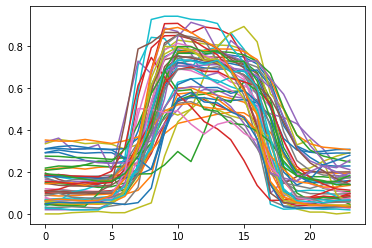

<ipython-input-9-01c649206e90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



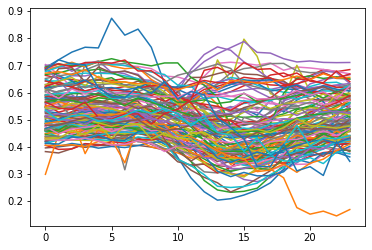

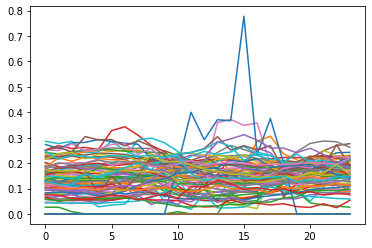

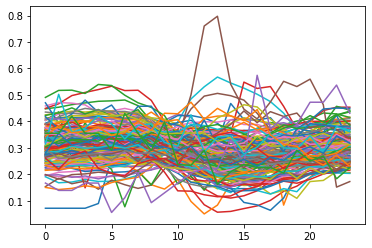

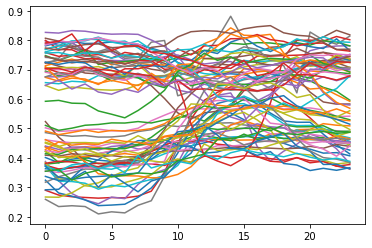

In [44]:
weekday_clusters = kmeans_cluster_plots(6, avail_hrs_weekday).reset_index()
weekend_clusters = kmeans_cluster_plots(4, avail_hrs_weekend).reset_index()

In [40]:
len(weekday_clusters)

447

In [41]:
len(weekend_clusters)

418

In [74]:
weekday_weekend_clusters = weekday_clusters.merge(weekend_clusters, on = 'dock_id')
weekday_weekend_clusters.rename(columns={"cluster_x": "weekday_cluster", "cluster_y": "weekend_cluster"}, inplace = True)

In [75]:
weekday_weekend_clusters = weekday_weekend_clusters[['dock_id', 'weekday_cluster', 'weekend_cluster']]

In [84]:
ML_table = pd.read_csv('../../../capstone_other/files_too_large_for_github/ML_table_4_all_stations_2018-19.csv')

In [77]:
ML_table['dock_id'].nunique()

510

In [78]:
ML_table = ML_table.merge(weekday_weekend_clusters, on = 'dock_id')

In [79]:
ML_table['dock_id'].nunique()

329

In [80]:
ML_table

dock_id                                      dock_name  \
0           3478  2 Ave & 36 St - Citi Bike HQ at Industry City   
1           3478  2 Ave & 36 St - Citi Bike HQ at Industry City   
2           3478  2 Ave & 36 St - Citi Bike HQ at Industry City   
3           3478  2 Ave & 36 St - Citi Bike HQ at Industry City   
4           3478  2 Ave & 36 St - Citi Bike HQ at Industry City   
...          ...                                            ...   
2869979      258                    DeKalb Ave & Vanderbilt Ave   
2869980      258                    DeKalb Ave & Vanderbilt Ave   
2869981      258                    DeKalb Ave & Vanderbilt Ave   
2869982      258                    DeKalb Ave & Vanderbilt Ave   
2869983      258                    DeKalb Ave & Vanderbilt Ave   

              formatted_date  year  month  num_day  hour   latitude  \
0        2018-05-01 00:00:00  2018      5        3     0  40.657089   
1        2018-05-01 01:00:00  2018      5        3     1  40.657089   
2        2018-05-01 01:00:00  2018      5        3     1  40.657089   
3        2018-05-01 02:00:00  2018      5        3     2  40.657089   
4        2018-05-01 02:00:00  2018      5        3     2  40.657089   
...                      ...   ...    ...      ...   ...        ...   
2869979  2018-12-15 06:00:00  2018     12        7     6  40.689407   
2869980  2018-12-15 07:00:00  2018     12        7     7  40.689407   
2869981  2018-12-15 07:00:00  2018     12        7     7  40.689407   
2869982  2018-12-15 08:00:00  2018     12        7     8  40.689407   
2869983  2018-12-15 09:00:00  2018     12        7     9  40.689407   

         longitude  avail_bikes  tot_docks  avail_bikes_proportion   tmp  \
0       -74.008702           29         43                0.674419   8.9   
1       -74.008702           29         43                0.674419   9.4   
2       -74.008702           29         43                0.674419   9.4   
3       -74.008702           29         43                0.674419   9.4   
4       -74.008702           29         43                0.674419   9.4   
...            ...          ...        ...                     ...   ...   
2869979 -73.968855           19         24                0.791667  10.0   
2869980 -73.968855           18         24                0.750000   8.9   
2869981 -73.968855           18         24                0.750000   8.9   
2869982 -73.968855           18         24                0.750000   9.4   
2869983 -73.968855           18         24                0.750000   8.9   

         rain  weekday_cluster  weekend_cluster  
0           0                2                3  
1           0                2                3  
2           0                2                3  
3           0                2                3  
4           0                2                3  
...       ...              ...              ...  
2869979     1                1                2  
2869980     1                1                2  
2869981     1                1                2  
2869982     1                1                2  
2869983     1                1                2  

[2869984 rows x 16 columns]

In [81]:
ML_table.drop(['formatted_date', 'year'], axis = 1, inplace = True)

In [83]:
ML_table.to_csv('../../')